In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [11]:
import pandas as pd
file_path = 'output.csv'
df = pd.read_csv(file_path)

In [10]:
df.dtypes

keyword            object
n_citation        float64
field_of_study     object
dtype: object

In [4]:
df['n_citation'].fillna(0, inplace=True) 
df['doc_type'].fillna('Unknown', inplace=True) 
df['reference_count'].fillna(0, inplace=True)  
df['references'] = df['references'].apply(lambda x: [] if pd.isnull(x) else x) 
df['venue_name'].fillna('Not Specified', inplace=True) 
df['keyword'].fillna('No Keywords', inplace=True) 
df['doi'].fillna('No DOI', inplace=True) 
df['publisher'].fillna('Unknown Publisher', inplace=True)  

# Dropping columns with a high percentage of missing values
df_cleaned = df.drop(columns=['volume', 'issue', 'weight']) 

In [5]:
import numpy as np

df_cleaned['id_log'] = np.log1p(df_cleaned['id'])
df_cleaned['n_citation_log'] = np.log1p(df_cleaned['n_citation'])


In [6]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    # Convert to lowercase and strip whitespaces
    df_cleaned[col] = df_cleaned[col].str.lower().str.strip()
    print(f"Standardized text in '{col}' by converting to lowercase and stripping whitespaces.")


Standardized text in 'title' by converting to lowercase and stripping whitespaces.
Standardized text in 'author_name' by converting to lowercase and stripping whitespaces.
Standardized text in 'author_org' by converting to lowercase and stripping whitespaces.
Standardized text in 'author_id' by converting to lowercase and stripping whitespaces.
Standardized text in 'doc_type' by converting to lowercase and stripping whitespaces.
Standardized text in 'references' by converting to lowercase and stripping whitespaces.
Standardized text in 'venue_name' by converting to lowercase and stripping whitespaces.
Standardized text in 'venue_type' by converting to lowercase and stripping whitespaces.
Standardized text in 'doi' by converting to lowercase and stripping whitespaces.
Standardized text in 'keyword' by converting to lowercase and stripping whitespaces.
Standardized text in 'publisher' by converting to lowercase and stripping whitespaces.
Standardized text in 'indexed_keyword' by converti

In [8]:
# Saving the cleaned dataset to a new CSV file
output_file_path = 'cleaned_data.csv'
df_cleaned.to_csv(output_file_path, index=False)

In [3]:
df = pd.read_csv('cleaned_data.csv')


/var/folders/_1/pytq1skj57b53vp2wq81373w0000gn/T/ipykernel_35254/1353080850.py:1: DtypeWarning: Columns (0,2,6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


In [5]:
df.dtypes

keyword           object
n_citation        object
field_of_study    object
dtype: object

# Hypothesis 4:
> There is a significant difference in citation counts across different research fields.

- Null Hypothesis (H₀): Mean citation counts are equal across research fields.
- Alternative Hypothesis (H₁): At least one research field has a different mean citation count.

> We'll be using the one-way ANOVA test as we are comparing means across multiple groups

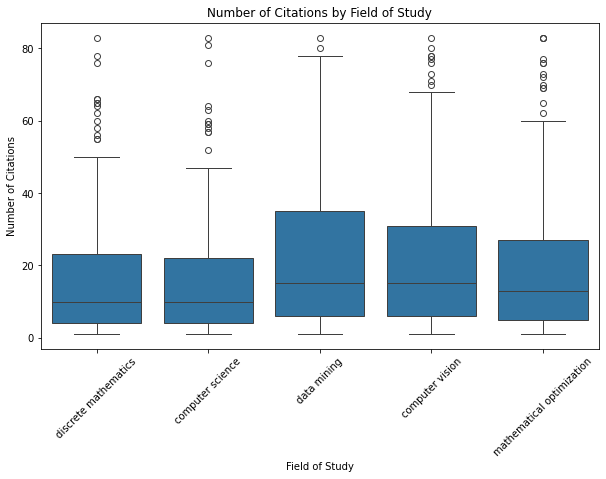

F-Statistic: 3.6356
P-value: 5.9891e-03
Reject the null hypothesis: Significant differences exist among research fields.


In [ ]:
df = df[['keyword', 'n_citation']].dropna()

# Extract primary field of study
df['field_of_study'] = df['keyword'].apply(lambda x: x.split(';')[0])

# Select top 5 fields by frequency
top_fields = df['field_of_study'].value_counts().nlargest(5).index
df = df[df['field_of_study'].isin(top_fields)]

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='field_of_study', y='n_citation', data=df)
plt.title('Number of Citations by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Number of Citations')
plt.xticks(rotation=45)
plt.show()

# Prepare data for ANOVA
groups = [group['n_citation'].values for name, group in df.groupby('field_of_study')]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: Significant differences exist among research fields.")
else:
    print("Fail to reject the null hypothesis: No significant differences among research fields.")

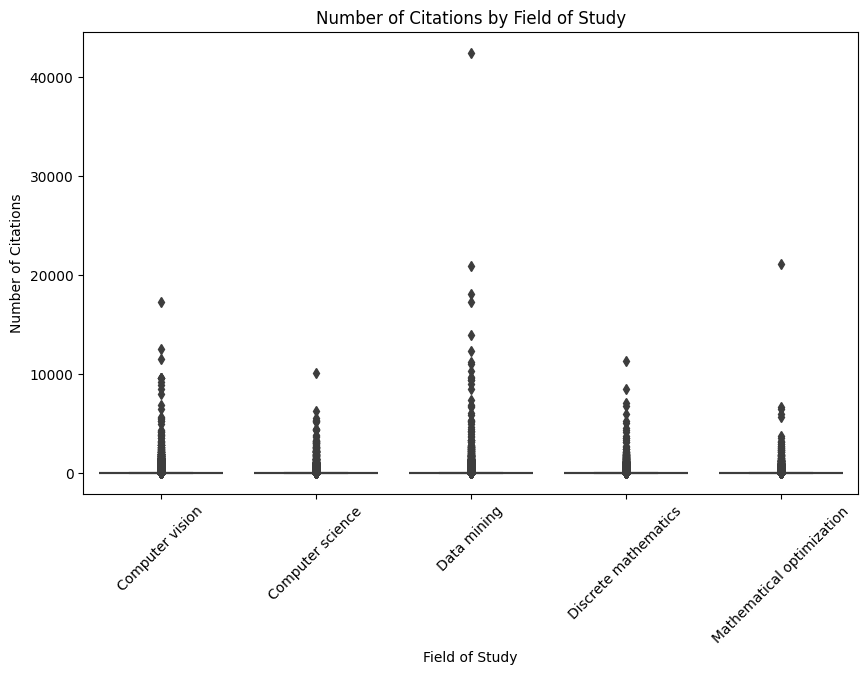

F-Statistic: 121.6890
P-value: 5.3705e-104
Reject the null hypothesis: Significant differences exist among research fields.


In [7]:
df = df[['keyword', 'n_citation']].dropna()

# Extract primary field of study
df['field_of_study'] = df['keyword'].apply(lambda x: x.split(';')[0])

# Select top 5 fields by frequency
top_fields = df['field_of_study'].value_counts().nlargest(5).index
df = df[df['field_of_study'].isin(top_fields)]

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='field_of_study', y='n_citation', data=df)
plt.title('Number of Citations by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Number of Citations')
plt.xticks(rotation=45)
plt.show()

# Prepare data for ANOVA
groups = [group['n_citation'].values for name, group in df.groupby('field_of_study')]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: Significant differences exist among research fields.")
else:
    print("Fail to reject the null hypothesis: No significant differences among research fields.")

# H1

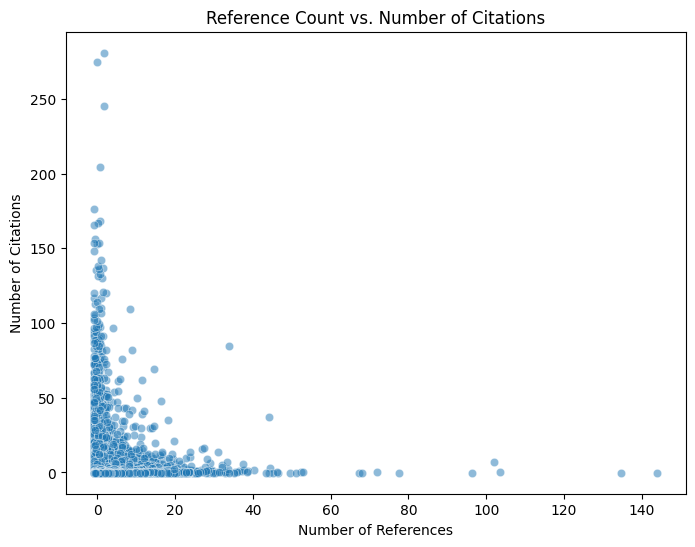

NameError: name 'pearsonr' is not defined

In [12]:
# Ensure the sample has the necessary columns and no missing values
df = df[['reference_count', 'n_citation']].dropna()

# normalize both the columns
df['reference_count'] = (df['reference_count'] - df['reference_count'].mean()) / df['reference_count'].std()
df['n_citation'] = (df['n_citation'] - df['n_citation'].mean()) / df['n_citation'].std()


# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='reference_count', y='n_citation', alpha=0.5)
plt.title('Reference Count vs. Number of Citations')
plt.xlabel('Number of References')
plt.ylabel('Number of Citations')
plt.show()



In [13]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(df['reference_count'], df['n_citation'])

print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant positive correlation b/w number of references and number of citations.")
else:
    print("Fail to reject the null hypothesis: No significant correlation found.")

Pearson Correlation Coefficient: 0.0597
P-value: 0.0000e+00
Reject the null hypothesis: There is a significant positive correlation b/w number of references and number of citations.


> At least one field differs significantly!

# H3

In [ ]:
# Extract necessary columns and drop missing values
df = df[['year', 'n_citation']].dropna()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='year', y='n_citation', alpha=0.5)
plt.title('Year of Publication vs. Number of Citations')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Citations')
plt.show()

# Calculate Spearman correlation
corr_coef, p_value = spearmanr(df['year'], df['n_citation'])

print(f"Spearman Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05
# Interpret the results
if p_value < alpha:
    if corr_coef < 0:
        print("Reject the null hypothesis: Older papers have more citations.")
    else:
        print("Reject the null hypothesis: Newer papers have more citations.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between year and citations.")